In [1]:
import matplotlib.pyplot as plt
import os
from shutil import copyfile
import numpy as np
import pandas as pd
import astropy.constants as c
import astropy.units as u
import sys
import pyathena as pa
from scipy.interpolate import interp1d
from matplotlib.ticker import MultipleLocator
import copy
from mpl_toolkits import axes_grid1

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib.colors import LogNorm
from six.moves import cPickle as pickle

class FixedOrderFormatter(ScalarFormatter):
    """Formats axis ticks using scientific notation with a constant order of 
    magnitude"""
    def __init__(self, order_of_mag=0, useOffset=True, useMathText=False):
        self._order_of_mag = order_of_mag
        ScalarFormatter.__init__(self, useOffset=useOffset, 
                                 useMathText=useMathText)
    def _set_orderOfMagnitude(self, range):
        """Over-riding this to avoid having orderOfMagnitude reset elsewhere"""
        self.orderOfMagnitude = self._order_of_mag

In [19]:
labell = ('No ICM','P1', 'P3','P3h', 'P7','P7h','P14')  # r'No ICM',
#C = ('gray', 'mediumturquoise', 'dodgerblue','mediumblue' ,'goldenrod','salmon', 'firebrick','darkmagenta','goldenrod','royalblue','crimson') # 'plum','orchid','purple'
C = ('k', 'powderblue', 'dodgerblue','mediumblue' ,'salmon', 'crimson','goldenrod')
Model = [0,8.63*1e3,3.46*1e4,3.46*1e4,6.92*1e4,6.92*1e4,1.38*1e5]
crit = 94
k=1
#plt.figure(figsize=(6,10))
plt.figure(figsize=(5,5))
#sf_ind = ([446, 453],[456, 445],[460, 456],[915, 914],[469, 553],[965, 1052],[506, 684])
#sf_ind = np.array(sf_ind)
#print sf_ind.shape
for j in (2,4):
    #plt.figure(figsize=(6,4))
    variable = 'density'

    P = np.genfromtxt('./proj/Pism_%s.txt' % labell[j])
    #SFR = np.genfromtxt('./proj/SFR_%s.txt'% labell[j])
    W = np.genfromtxt('./proj/Weight_%s.txt'% labell[j])
    Mom_ism = np.genfromtxt('./proj/Mom_ism_%s.txt' % labell[j])
    #D = np.genfromtxt('./proj/Dc_%s.txt' % labell[j])
    if j!=0:
        icm_tot = np.genfromtxt('./proj/Picm_tot_%s.txt' % labell[j])
        icm_th = np.genfromtxt('./proj/Picm_ther_%s.txt' % labell[j])
        icm_tu = np.genfromtxt('./proj/Picm_turb_%s.txt' % labell[j])
        Mom_icm = np.genfromtxt('./proj/Mom_icm_%s.txt' % labell[j])
    #print W
    #print W[0,0],W[0,-1]
    #print P[0].shape
    #print P[0,0],P[0,-1]
    #print Mom_ism # Mo/pc2s
    #print Mom_icm.shape
    Mom_ism = np.cumsum(Mom_ism[:,::-1],axis=1)[:,::-1]
    Mom_icm = np.cumsum(Mom_icm[:,::-1],axis=1)[:,::-1]
    
    Momism_t=Mom_ism[:,0]-Mom_ism[1,0]
    Momicm_t=Mom_icm[:,0]-Mom_icm[1,0]
    
    delF = P[:,-1]-P[:,0]
    Fp = np.sum(delF)/len(delF)
    Wp = np.sum(W[:,0])/len(W[:,0])
    print Fp, Wp
    plt.semilogy(Momism_t,'r')
    plt.show()
    plt.semilogy(Momicm_t,'b')
    plt.show()
    #print delF
    #print delF.shape
    #print j,np.sum(delF)/len(delF)

IOError: ./proj/Pism_P3.txt not found.

In [18]:
labell = ('No ICM','P1', 'P3','P3h', 'P7','P7h','P14')  # r'No ICM',
#C = ('gray', 'mediumturquoise', 'dodgerblue','mediumblue' ,'goldenrod','salmon', 'firebrick','darkmagenta','goldenrod','royalblue','crimson') # 'plum','orchid','purple'
C = ('k', 'powderblue', 'dodgerblue','mediumblue' ,'salmon', 'crimson','goldenrod')
Model = [0,8.63*1e3,3.46*1e4,3.46*1e4,6.92*1e4,6.92*1e4,1.38*1e5]
crit = 94
k=1
#plt.figure(figsize=(6,10))
plt.figure(figsize=(5,5))
sec = 3.17098e-14 # 1sec in Mega year
gram = 5.02785 * 1e-34  # 1g in solar mass
cm = 3.24078 * 1e-19  # 1cm in parsec
kb = 1.38064852 * 1e-16  # boltzmann constant erg/K / erg = g cm2/s2

#sf_ind = ([446, 453],[456, 445],[460, 456],[915, 914],[469, 553],[965, 1052],[506, 684])
#sf_ind = np.array(sf_ind)
#print sf_ind.shape
for j in (0,1,2,3,4,5,6):
    #plt.figure(figsize=(6,4))
    variable = 'density'

    P = np.genfromtxt('./proj/Pism_%s.txt' % labell[j])
    #SFR = np.genfromtxt('./proj/SFR_%s.txt'% labell[j])
    W = np.genfromtxt('./proj/Weight_%s.txt'% labell[j])
    Mom_ism = np.genfromtxt('./proj/Mom_ism_%s.txt' % labell[j]) # Solmar mass / pc2 s
    #D = np.genfromtxt('./proj/Dc_%s.txt' % labell[j])
    if j!=0:
        icm_tot = np.genfromtxt('./proj/Picm_tot_%s.txt' % labell[j])
        icm_th = np.genfromtxt('./proj/Picm_ther_%s.txt' % labell[j])
        icm_tu = np.genfromtxt('./proj/Picm_turb_%s.txt' % labell[j])
        Mom_icm = np.genfromtxt('./proj/Mom_icm_%s.txt' % labell[j])
    #print W
    #print W[0,0],W[0,-1]
    #print P[0].shape
    #print P[0,0],P[0,-1]
    #print Mom_ism # Mo/pc2s
    #print Mom_icm.shape
    if j==3 or j==5:
        Mom_ism = np.cumsum(Mom_ism[:,::-1],axis=1)[:,::-1]*4*gram/cm/kb/sec
        Mom_icm = np.cumsum(Mom_icm[:,::-1],axis=1)[:,::-1]*4*gram/cm/kb/sec
    else:
        Mom_ism = np.cumsum(Mom_ism[:,::-1],axis=1)[:,::-1]*8*gram/cm/kb/sec
        Mom_icm = np.cumsum(Mom_icm[:,::-1],axis=1)[:,::-1]*8*gram/cm/kb/sec
    
    Momism_t=Mom_ism[:,0]-Mom_ism[1,0]
    Momicm_t=Mom_icm[:,0]-Mom_icm[1,0]
    
    delF = P[:,-1]-P[:,0]
    Fp = np.sum(delF)/len(delF)
    Wp = np.sum(W[:,0])/len(W[:,0])
    print Fp, Wp
    plt.plot(Momism_t,'r',label='ISM_%s' % labell[j])
    if j!=0:
        plt.plot(Momicm_t,'b',label='ICM')
    plt.legend(loc=0)
    #plt.savefig('Mom_%s.png' % labell[j])
    plt.show()

IOError: ./proj/Pism_No ICM.txt not found.

In [17]:
labell = ('No ICM','P1', 'P3','P3h', 'P7','P7h','P14')  # r'No ICM',
#C = ('gray', 'mediumturquoise', 'dodgerblue','mediumblue' ,'goldenrod','salmon', 'firebrick','darkmagenta','goldenrod','royalblue','crimson') # 'plum','orchid','purple'
C = ('k', 'powderblue', 'dodgerblue','mediumblue' ,'salmon', 'crimson','goldenrod')
Model = [0,8.63*1e3,3.46*1e4,3.46*1e4,6.92*1e4,6.92*1e4,1.38*1e5]
crit = 94
k=1
#plt.figure(figsize=(6,10))
#plt.figure(figsize=(5,5))
sec = 3.17098e-14 # 1sec in Mega year
gram = 5.02785e-34  # 1g in solar mass
cm = 3.24078e-19  # 1cm in parsec
km = 3.24078e-14  # 1km in parsec
kb = 1.38064852e-16  # boltzmann constant erg/K / erg = g cm2/s2

#sf_ind = ([446, 453],[456, 445],[460, 456],[915, 914],[469, 553],[965, 1052],[506, 684])
#sf_ind = np.array(sf_ind)
#print sf_ind.shape

for j in (0,1,2,3,4,5,6):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #plt.figure(figsize=(6,4))
    variable = 'density'

    P = np.genfromtxt('./proj/Pism_%s.txt' % labell[j])*kb # K cm-3 -> g cm-1 s-2
    #SFR = np.genfromtxt('./proj/SFR_%s.txt'% labell[j])
    W = np.genfromtxt('./proj/Weight_%s.txt'% labell[j])*kb # K cm-3 -> g cm-1 s-2
    mom_ism = np.genfromtxt('./proj/Mom_ism_%s.txt' % labell[j])/km # Solmar mass / pc3 * km / s
    #D = np.genfromtxt('./proj/Dc_%s.txt' % labell[j])
    if j!=0:
        icm_tot = np.genfromtxt('./proj/Picm_tot_%s.txt' % labell[j])*kb # K cm-3 -> g cm-1 s-2
        icm_th = np.genfromtxt('./proj/Picm_ther_%s.txt' % labell[j])
        icm_tu = np.genfromtxt('./proj/Picm_turb_%s.txt' % labell[j])
        mom_icm = np.genfromtxt('./proj/Mom_icm_%s.txt' % labell[j])/km 
    else:
        mom_icm=mom_ism
    #print W
    #print W[0,0],W[0,-1]
    #print P.shape
    #print P[0,0],P[0,-1]
    #print Mom_ism # Mo/pc2s
    #print Mom_icm.shape
    #print np.trapz(mom_ism[:,::-1],axis=1,dx=4)
    
    area = 1024. * 1024 # area in pc2
    
    # solar mass pc-2 s-1 -> sm pc-1 s-1 -> g pc-1 s-1 -> g cm-1 s -1 -> 
    
    if j==3 or j==5:
        Mom_ism = np.trapz(mom_ism,axis=1,dx=4)# axis=1 mean vertical direction
        Mom_icm = np.trapz(mom_icm,axis=1,dx=4)# Mo pc-3 km/s -> Mo pc-2 km/s
        
    else:
        Mom_ism = np.trapz(mom_ism,axis=1,dx=8)
        Mom_icm = np.trapz(mom_icm,axis=1,dx=8)#*gram/cm/kb/sec

    # Difference between two time step is actually time integration
    #print np.arange(1,len(Mom_ism))
    Momism_t=np.divide((Mom_ism-Mom_ism[1])[1::],np.arange(1*0.97779222,len(Mom_ism)*0.97779222,0.97779222))*area# divide time difference & multiply area + conversion
    Momicm_t=np.divide((Mom_icm-Mom_icm[1])[1::],np.arange(1*0.97779222,len(Mom_icm)*0.97779222,0.97779222))*area# Mo pc-2 km/s * pc2 /Myr -> Mo km/s / Myr
    #print Momism_t
    #print Momicm_t
    
    F_tav = np.mean(P,axis=0) # pressure time average / still g cm-1 s-2 
    delF = F_tav[0] - F_tav[-1] # corresponding to vertical integration
    delFA = delF*area*gram/cm/km/sec # Mo km/s /Myr # represents pressure term
    #delFA = delF*area # K cm-3 pc2
    #delFA = delFA*kb # g cm-1 s-2 pc2
    #delFA = delFA*gram/cm # Mo pc s-2
    #delFA = delFA*km # Mo km s-2
    #delFA = delFA*sec # Mo km/s /Myr
    
    if j!=0:
        F_tav_icm = np.mean(icm_tot,axis=0) # pressure time average
        delF_i = F_tav_icm[0]-F_tav_icm[-1] # corresponding to vertical integration
        delFA_i = delF_i*area*gram/cm/km/sec # Mo km/s /Myr
        #delFA_i = delF_i*area # K cm-3 pc2
        #delFA_i = delFA_i*kb # g cm-1 s-2 pc2
        #delFA_i = delFA_i*gram/cm # Mo pc s-2
        #delFA_i = delFA_i*km # Mo km s-2
        #delFA_i = delFA_i*sec # Mo km/s /Myr
        
    else:
        delFA_i = 0

    Wp = np.sum(W[:,0])/len(W[:,0])*area*gram/cm/km/sec
    print -np.log10(abs(delFA)), np.log10(Wp) ,np.log10(delFA_i)
    
    ax.axhline(0,c='k',ls='--')
    ax.semilogy(Momism_t,'r',label='ISM_%s' % labell[j])
    print -np.log10(abs(Momism_t[-1]))
    if j!=0:
        ax.plot(Momicm_t,'b',label='ICM')
    
    ax.set_xlim(-2,250)
    ax.set_ylabel(r'M$_{\odot}$ km s$^{-1}$ Myr$^{-1}$')
    #plt.yscale('symlog', linthreshy=0.01)
    plt.legend(loc=0)
    ax.yaxis.set_major_formatter(FixedOrderFormatter(6))
    #plt.savefig('Mom_%s.png' % labell[j])
    plt.show()

IOError: ./proj/Pism_No ICM.txt not found.

(249L,)
-2.0113486020465987 -inf 4.901672513304446 1.7741981680365435
-4.560988128146633


C:\anaconda2\lib\site-packages\ipykernel_launcher.py:98: RuntimeWarning: divide by zero encountered in log10


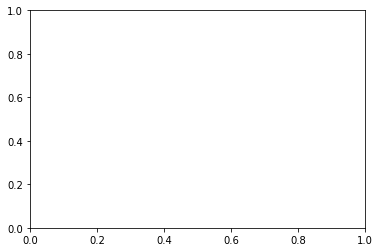

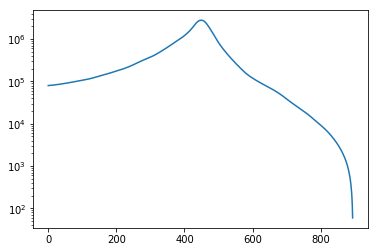

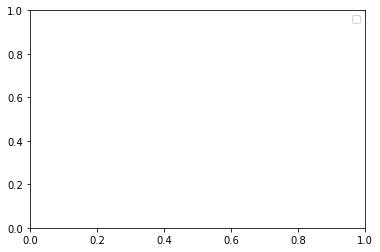

(249L,)
-1.6290759485610569 6.339035355731506 6.294117513021661 1.809089831562962
-5.298005193268427


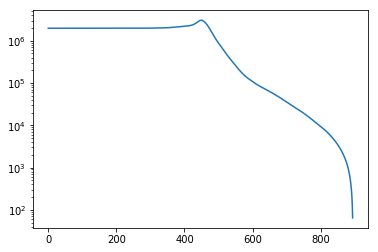

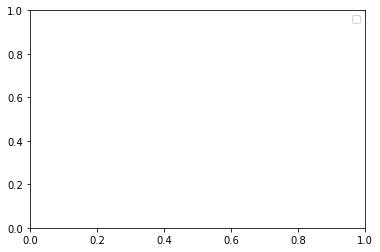

(249L,)
-1.242250042030296 6.888167836660571 6.63499465215699 2.097042516051148
-3.9402280761639505


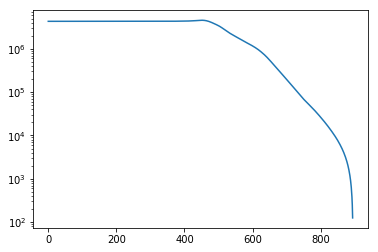

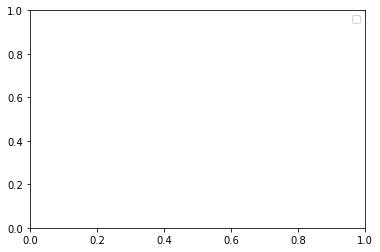

(249L,)
-2.455176554736066 6.893352949117998 6.647387425049128 2.348729658342421
-4.984110431816924


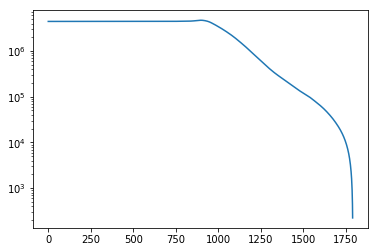

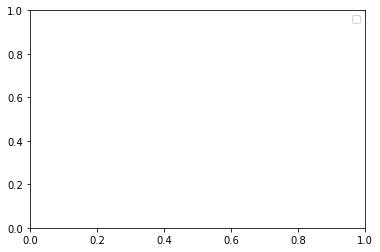

(249L,)
-3.285567109697312 7.107938498416319 6.318871308152474 3.887221141472971
-4.767500370781893


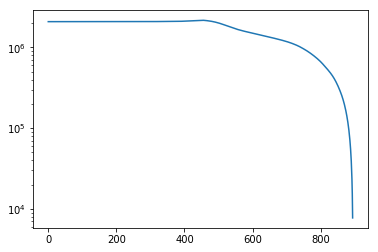

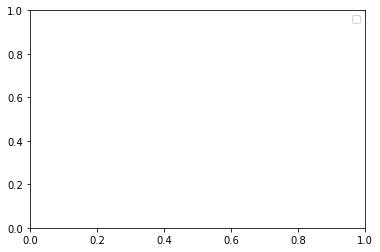

(223L,)
-3.1726269655515265 7.147833993246204 6.400790002943836 3.641919975172546
-4.295116845946732


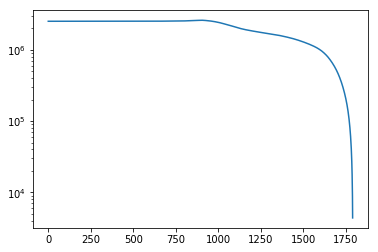

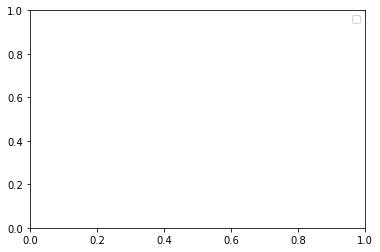

(223L,)
-3.4974680027931773 7.1643548468924125 5.845362644670168 3.1685967689918444
-4.628498787453289


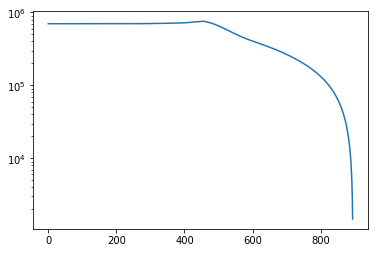

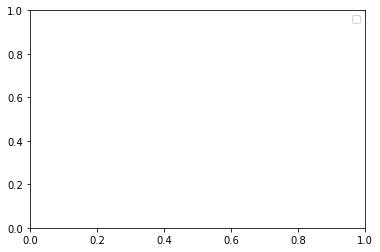

In [16]:
labell = ('No ICM','P1', 'P3','P3h', 'P7','P7h','P14')  # r'No ICM',
#C = ('gray', 'mediumturquoise', 'dodgerblue','mediumblue' ,'goldenrod','salmon', 'firebrick','darkmagenta','goldenrod','royalblue','crimson') # 'plum','orchid','purple'
C = ('k', 'powderblue', 'dodgerblue','mediumblue' ,'salmon', 'crimson','goldenrod')
Model = [0,8.63*1e3,3.46*1e4,3.46*1e4,6.92*1e4,6.92*1e4,1.38*1e5]
crit = 94
k=1

sec = 3.17098e-14 # 1sec in Mega year
gram = 5.02785e-34  # 1g in solar mass
cm = 3.24078e-19  # 1cm in parsec
km = 3.24078e-14  # 1km in parsec
kb = 1.38064852e-16  # boltzmann constant erg/K / erg = g cm2/s2

for j in (0,1,2,3,4,5,6):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # All quantities are already horizontal averaged
    
    Pc = np.genfromtxt('./mwp_test/Pc_%s.txt' % labell[j])*kb # ISM cold/warm total pressure # K cm-3 -> g cm-1 s-2
    Ph = np.genfromtxt('./mwp_test/Ph_%s.txt' % labell[j])*kb # ISM hot total pressure
    P = np.add(Pc,Ph)

    Wc = np.genfromtxt('./mwp_test/Weight_c_%s.txt'% labell[j])*kb # ISM cold/warm weight # K cm-3 -> g cm-1 s-2
    Wh = np.genfromtxt('./mwp_test/Weight_h_%s.txt'% labell[j])*kb # ISM hot weight
    W = np.add(Wc,Wh)
    
    mom_ism = np.genfromtxt('./mwp_test/Mom_ism_%s.txt' % labell[j])/km # Solmar mass / pc3 * km / s
    #D = np.genfromtxt('./proj/Dc_%s.txt' % labell[j])
    if j!=0:
        icm_tot = np.genfromtxt('./mwp_test/Picm_tot_%s.txt' % labell[j])*kb # ICM total pressure # K cm-3 -> g cm-1 s-2
        icm_th = np.genfromtxt('./mwp_test/Picm_ther_%s.txt' % labell[j])*kb 
        icm_tu = np.genfromtxt('./mwp_test/Picm_turb_%s.txt' % labell[j])*kb 
        mom_icm = np.genfromtxt('./mwp_test/Mom_icm_%s.txt' % labell[j])/km 
    else:
        mom_icm=mom_ism

    
    area = 1024. * 1024 # area in pc2

    # solar mass pc-2 s-1 -> sm pc-1 s-1 -> g pc-1 s-1 -> g cm-1 s -1 -> 
    
    if j==3 or j==5:
        Mom_ism = np.trapz(mom_ism,axis=1,dx=4)# vertical integration / axis=1 mean vertical direction 
        Mom_icm = np.trapz(mom_icm,axis=1,dx=4)# Mo pc-3 km/s -> Mo pc-2 km/s
        Area = 1024 * 1024 / 4 / 4. # number of cell in the plane
        dz=4
        
    else:
        Mom_ism = np.trapz(mom_ism,axis=1,dx=8)
        Mom_icm = np.trapz(mom_icm,axis=1,dx=8)
        Area = 1024 * 1024 / 8 / 8. # number of cell in the plane
        dz=8
        
    # Difference between two time step is actually time integration
    # Dividiving by time array represents time evolution, last value represents time integration from intial to final
    
    #print np.arange(1,len(Mom_ism))
    Momism_t=np.divide((Mom_ism-Mom_ism[1])[1::],np.arange(1*0.97779222,len(Mom_ism)*0.97779222,0.97779222))*area# divide time difference & multiply area + conversion
    Momicm_t=np.divide((Mom_icm-Mom_icm[1])[1::],np.arange(1*0.97779222,len(Mom_icm)*0.97779222,0.97779222))*area# Mo pc-2 km/s * pc2 /Myr -> Mo km/s / Myr
    #print Momism_t
    #print Momicm_t
    
    # I think momentum should be differentiated by time and then integrated by time,
    # Also, pressure should be differentiated by z before time average, but not sure..
    
    dPdz = np.gradient(P,dz,axis=1) # g cm-1 s-2 pc-1 / # trial: time derivative form 
    
    F_tav = np.mean(dPdz,axis=0) # pressure time average / still g cm-1 s-2 pc-1/ axis=0 is time axis
    
    #F_tav = np.mean(P,axis=0) # this is original method that i use
    
    delF = F_tav[0] - F_tav[-1] # corresponding to vertical integration # g cm-1 s-2 
    #print delF*area*gram
    #print delF*area*gram/cm
    #print delF*area*gram/cm/km
    delFA = delF*area*gram/cm/km/sec # Mo km/s /Myr # represents pressure term
    
    #delFA = delF*area # K cm-3 pc2
    #delFA = delFA*kb # g cm-1 s-2 pc2
    #delFA = delFA*gram/cm # Mo pc s-2
    #delFA = delFA*km # Mo km s-2
    #delFA = delFA*sec # Mo km/s /Myr
    
    if j!=0:
        F_tav_icm = np.mean(icm_tot,axis=0) # pressure time average
        delF_i = F_tav_icm[0]-F_tav_icm[-1] # corresponding to vertical integration

        delFA_i = delF_i*area*gram/cm/km/sec # Mo km/s /Myr
        #delFA_i = delF_i*area # K cm-3 pc2
        #delFA_i = delFA_i*kb # g cm-1 s-2 pc2
        #delFA_i = delFA_i*gram/cm # Mo pc s-2
        #delFA_i = delFA_i*km # Mo km s-2
        #delFA_i = delFA_i*sec # Mo km/s /Myr
        
    else:
        delFA_i = 0
    print W[:,0].shape
    #Wp = np.sum(W[:,0])/len(W[:,0])*area*gram/cm/km/sec
    Wp = np.mean(W,axis=0)*area*gram/cm/km/sec # time average
    print -np.log10(abs(delFA)),np.log10(delFA_i), np.log10(Wp[0]), np.log10(Wp[-1])
    print -np.log10(abs(Momism_t[-1]))
    plt.semilogy(Wp)
    plt.show()
    
    ############## Plot #############
    ax.axhline(0,c='k',ls='--')
    ax.plot(Momism_t,'r',label='ISM_%s' % labell[j])
    
    #print np.log10(abs(delFA)+abs(Momism_t[-1]))
    if j!=0:
        ax.plot(Momicm_t,'b',label='ICM')
    
    ax.set_xlim(-2,250)
    ax.set_ylabel(r'M$_{\odot}$ km s$^{-1}$ Myr$^{-1}$')
    #plt.yscale('symlog', linthreshy=0.01)
    plt.legend(loc=0)
    ax.yaxis.set_major_formatter(FixedOrderFormatter(6))
    #plt.savefig('Mom_%s.png' % labell[j])
    plt.show()